In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import json
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fig_settings as fs

In [101]:
colors = ["#2d5d83", "#4f9bd9", "#077187", "#3dfaff", "#8b888e"]
fs.set_fonts()

In [104]:
with open("data/starterpack-stats.json") as f:
    data = json.load(f)

component_sizes, component_numbers = data["components"]
edge_sizes = np.array(data["edge-sizes"])
degrees = np.array(data["degrees"])

creation_dates = [datetime.strptime(date, "%Y-%m-%d") for date in data["date-created"]]
n_starterpacks_created = np.array(data["number-created"])
num_nodes = data["num-nodes"]
num_edges = data["num-edges"]

account_age_at_creation = data["account-age-at-creation"]

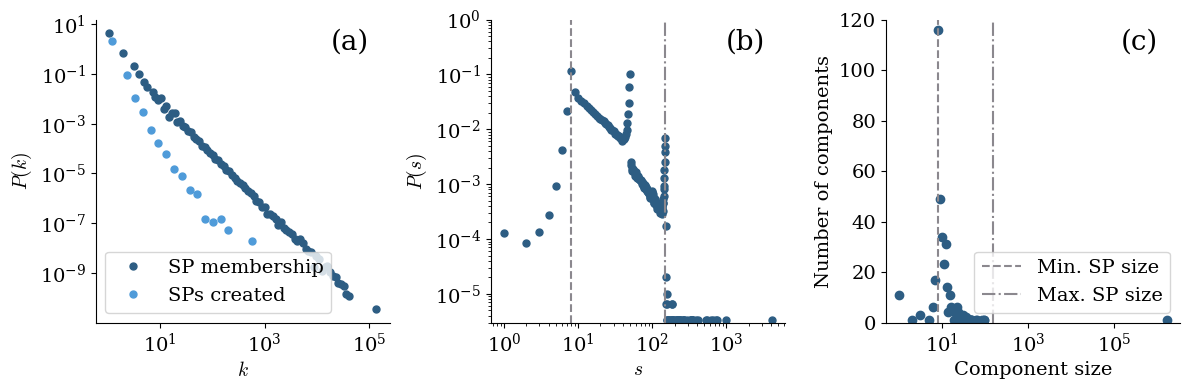

In [129]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
ax = plt.gca()
plt.text(0.8, 0.9, "(a)", fontsize=20, transform=ax.transAxes)

hist, bin_edges = np.histogram(
    degrees,
    bins=np.logspace(np.log10(degrees.min()), np.log10(degrees.max()), 100),
    density=True,
)
bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]

plt.plot(bin_centers, hist, "o", color=colors[0], markersize=5, label="SP membership")

hist, bin_edges = np.histogram(
    n_starterpacks_created,
    bins=np.logspace(
        np.log10(n_starterpacks_created.min()),
        np.log10(n_starterpacks_created.max()),
        20,
    ),
    density=True,
)
bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]

plt.plot(bin_centers, hist, "o", color=colors[1], markersize=5, label="SPs created")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.legend(loc="lower left")

plt.subplot(132)
ax = plt.gca()
plt.text(0.8, 0.9, "(b)", fontsize=20, transform=ax.transAxes)

s, p = np.unique(edge_sizes, return_counts=True)
plt.plot(s, p / p.sum(), "o", markersize=5, color=colors[0])
plt.plot([8, 8], [3e-6, 1], "--", label="Min. starter pack size", color=colors[4])
plt.plot([150, 150], [3e-6, 1], "-.", label="Max. starter pack size", color=colors[4])
plt.xscale("log")
plt.yscale("log")
plt.ylim([3e-6, 1])
plt.xlabel(r"$s$")
plt.ylabel(r"$P(s)$")

plt.subplot(133)
ax = plt.gca()
plt.text(0.8, 0.9, "(c)", fontsize=20, transform=ax.transAxes)

plt.plot(component_sizes, component_numbers, "o", color=colors[0])
plt.xscale("log")
plt.plot([8, 8], [0, 120], "--", label="Min. SP size", color=colors[4])
plt.plot([150, 150], [0, 120], "-.", label="Max. SP size", color=colors[4])
sns.despine()
plt.legend()
plt.ylim([0, 120])
plt.xlabel("Component size")
plt.ylabel("Number of components")
plt.tight_layout()
plt.savefig("figures/starterpack_stats.pdf", dpi=1000)
plt.show()

In [84]:
## stats about starter pack sizes
print(f"Min starter pack size is ", edge_sizes.min())
print(f"Max starter pack size is ", edge_sizes.max())
print(f"Mean starter pack size is ", round(edge_sizes.mean(), 3))

Min starter pack size is  0
Max starter pack size is  4070
Mean starter pack size is  32.862


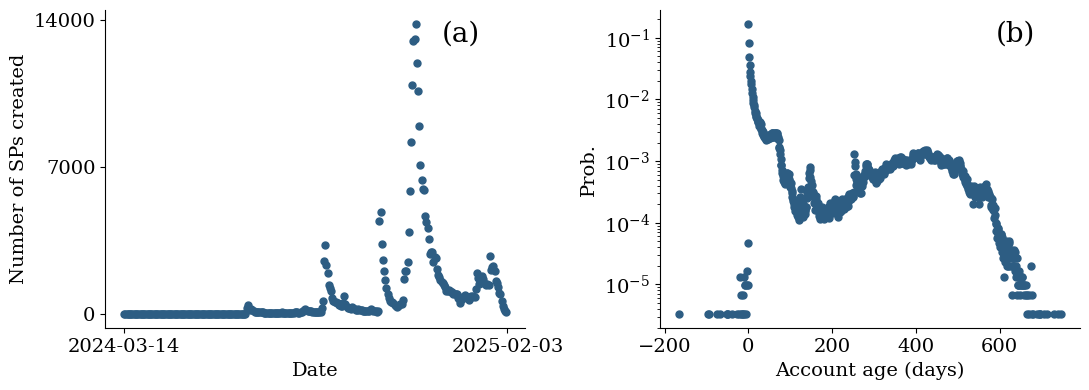

In [127]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
ax = plt.gca()
plt.text(0.8, 0.9, "(a)", fontsize=20, transform=ax.transAxes)
bins = np.arange(
    min(creation_dates), max(creation_dates) + timedelta(days=1), timedelta(days=1)
)

c, t = np.histogram(creation_dates, bins=bins)

plt.plot(t[:-1], c, "o", markersize=5, color=colors[0])

plt.xticks([min(bins), max(bins)])
plt.yticks([0, 7e3, 14e3], ["0", "7000", "14000"])
sns.despine()

plt.xlabel(r"Date")
plt.ylabel(r"Number of SPs created")

plt.subplot(122)
ax = plt.gca()
plt.text(0.8, 0.9, "(b)", fontsize=20, transform=ax.transAxes)
d, p = np.unique(account_age_at_creation, return_counts=True)
plt.plot(d, p / p.sum(), "o", markersize=5, color=colors[0])
plt.yscale("log")
plt.xlabel(r"Account age (days)")
plt.ylabel(r"Prob.")
sns.despine()

plt.tight_layout()
plt.savefig("figures/temporal_starterpack_stats.pdf", dpi=1000)
plt.show()